In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

In [ ]:
# notebook formatting
from IPython.core.display import HTML, display

In [ ]:
# load csv file
raw_asset_prices_df = pd.read_csv("daily_asset_prices.csv", index_col="Date")

# observe first five rows
raw_asset_prices_df.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,...,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,81.83,16.40,235.46,46.78,69.87,114.60,47.69,33.18,30.95,60.02,...,58.20,72.77,33.53,58.70,69.82,26.25,64.01,55.70,104.96,94.5100
2017-11-07,81.89,16.43,235.42,46.56,69.64,114.65,47.22,33.07,31.09,59.65,...,58.17,72.20,33.52,58.64,70.16,26.38,63.66,55.66,105.01,94.5400
2017-11-06,81.86,16.53,235.41,46.86,69.90,115.26,47.20,33.34,31.22,59.18,...,58.67,71.98,33.34,58.58,70.25,26.75,63.63,55.00,105.00,94.7500
2017-11-03,81.80,16.22,235.18,46.34,69.80,115.42,47.09,33.39,31.22,59.19,...,58.58,71.88,33.66,58.83,68.68,26.78,63.49,55.21,105.00,94.4400
2017-11-02,81.73,16.12,234.96,46.58,69.91,116.15,47.31,33.50,31.43,59.05,...,58.69,71.89,33.71,58.86,68.48,26.89,62.99,55.01,105.04,94.6299


In [ ]:
# get number of rows and columns of the dataset
df_shape = raw_asset_prices_df.shape
print(f"The dataset contains {df_shape[0]} rows and {df_shape[1]} columns.")
print((f"Timeframe of the Dataset: From {min(raw_asset_prices_df.index)} " f"to {max(raw_asset_prices_df.index)}"))

The dataset contains 1013 rows and 39 columns.
Timeframe of the Dataset: From 2013-11-01 to 2017-11-08


In [ ]:
# holds log returns information
log_returns_df = pd.DataFrame()

# obtain log returns of each asset
# calculate the daily log returns by looping through each column in dataframe and add log returns to the df
for col in raw_asset_prices_df.columns:

    log_returns_df[col] = np.log(raw_asset_prices_df[col]).diff(-1)

# return output of log returns dataframe
log_returns_df.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,...,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-08,-0.000733,-0.001828,0.000170,0.004714,0.003297,-0.000436,0.009904,0.003321,-0.004513,0.006184,...,0.000516,0.007864,0.000298,0.001023,-0.004858,-0.004940,0.005483,0.000718,-0.000476,-0.000317
2017-11-07,0.000366,-0.006068,0.000042,-0.006423,-0.003727,-0.005306,0.000424,-0.008131,-0.004173,0.007911,...,-0.008559,0.003052,0.005384,0.001024,-0.001282,-0.013928,0.000471,0.011929,0.000095,-0.002219
2017-11-06,0.000733,0.018932,0.000977,0.011159,0.001432,-0.001387,0.002333,-0.001499,0.000000,-0.000169,...,0.001535,0.001390,-0.009552,-0.004259,0.022602,-0.001121,0.002203,-0.003811,0.000000,0.003277
2017-11-03,0.000856,0.006184,0.000936,-0.005166,-0.001575,-0.006305,-0.004661,-0.003289,-0.006704,0.002368,...,-0.001876,-0.000139,-0.001484,-0.000510,0.002916,-0.004099,0.007906,0.003629,-0.000381,-0.002009
2017-11-02,0.000979,0.006223,0.003283,0.001289,0.003008,0.002759,0.005723,0.004488,0.009591,0.001186,...,0.002559,0.002089,-0.011210,-0.007279,-0.002916,0.009341,0.000476,0.003642,0.000000,0.004553


In [ ]:
# obtain correlation matrix with corr() function.
correlation_matrix = log_returns_df.corr()

correlation_matrix.head()

,Bonds Global,Commodities,DOW,Emerg Markets,EAFE,Emerg Markets Bonds,Pacifix ex Japan,Germany,Italy,Japan,...,Europe,Pacific,VXX,Materials,Energy,Finance,Tech,Utilities,ST Corp Bond,CHF
Bonds Global,1.000000,-0.086234,-0.279161,-0.069623,-0.177521,0.296679,-0.104739,-0.188547,-0.201014,-0.159231,...,-0.181249,-0.141707,0.222886,-0.220603,-0.198536,-0.420264,-0.197672,0.301774,0.598105,0.250142
Commodities,-0.086234,1.000000,0.305137,0.428909,0.369637,0.313791,0.400316,0.283711,0.331083,0.250509,...,0.367019,0.341089,-0.224835,0.429541,0.677430,0.257454,0.225463,0.089290,0.028872,0.042324
DOW,-0.279161,0.305137,1.000000,0.719260,0.793387,0.343817,0.688344,0.722882,0.666315,0.691672,...,0.765251,0.769604,-0.797538,0.817422,0.655544,0.874902,0.849271,0.395247,-0.042967,-0.172730
Emerg Markets,-0.069623,0.428909,0.719260,1.000000,0.796425,0.580454,0.815049,0.697222,0.660268,0.638955,...,0.763111,0.811155,-0.668680,0.674630,0.607172,0.606749,0.686458,0.365031,0.123624,-0.018461
EAFE,-0.177521,0.369637,0.793387,0.796425,1.000000,0.466883,0.790699,0.884385,0.830052,0.785198,...,0.949368,0.872972,-0.721559,0.720030,0.610561,0.711714,0.725415,0.352270,0.050121,0.021760


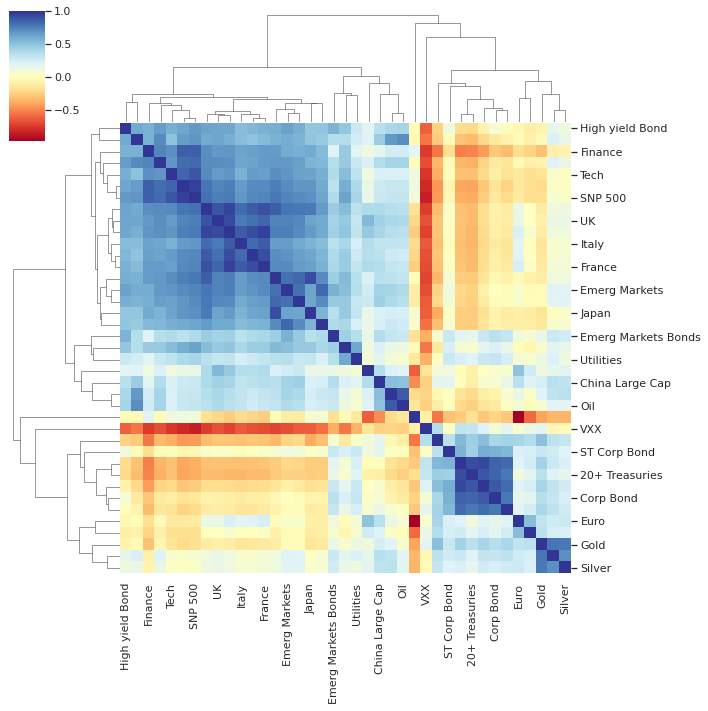

In [ ]:
# clustered heatmap
# Heatmap of correlations between asset price returns
sns.clustermap(correlation_matrix, cmap="RdYlBu")
plt.show()

In [ ]:
# matrix converted to list of edges
edges = correlation_matrix.stack().reset_index()
# rename the columns
edges.columns = ["asset_1", "asset_2", "correlation"]

# take off self correlations
edges = edges.loc[edges["asset_1"] != edges["asset_2"]].copy()

edges.head()

,asset_1,asset_2,correlation
1,Bonds Global,Commodities,-0.086234
2,Bonds Global,DOW,-0.279161
3,Bonds Global,Emerg Markets,-0.069623
4,Bonds Global,EAFE,-0.177521
5,Bonds Global,Emerg Markets Bonds,0.296679


In [ ]:
# build an undirected graph with weights
G0 = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# observe graph
print(nx.info(G0))

Graph with 39 nodes and 741 edges


In [ ]:
# set minium correlation to 50% threshold to reduce edges from the diagram
threshold = 0.5

# create a new graph from edge list
Gx = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# Used to store edges to remove
remove = []
# Find correlations which are below the threshold
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]["correlation"]
    # add to remove node list
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# remove edges contained in the remove list
Gx.remove_edges_from(remove)

# Observe number of removed edges
print(str(len(remove)) + " edges removed")

530 edges removed


In [ ]:
# construct graph features

def assign_colour(correlation):
    if correlation <= 0:
        return "#ffa09b"  # peach
    else:
        return "#9eccb7"  # green


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation) ** scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor


# assign colours to edges depending on positive or negative correlation
# assign edge thickness depending on magnitude of correlation
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, "correlation").items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))

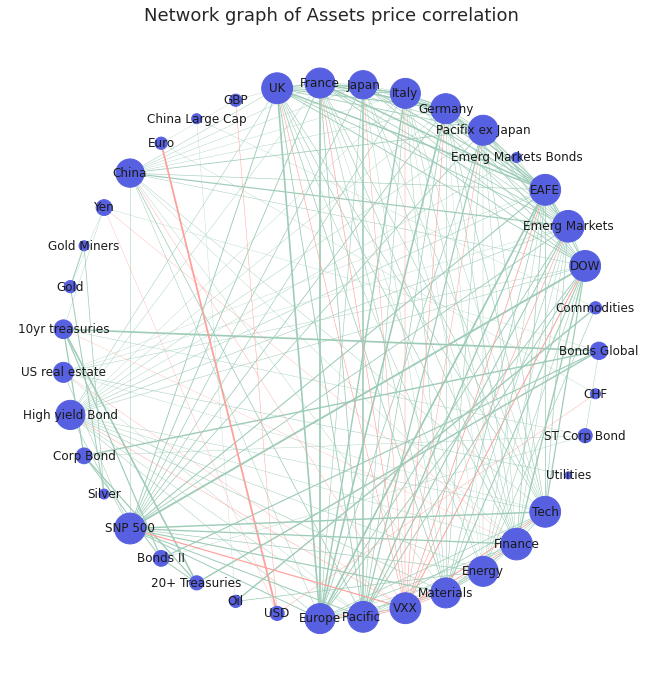

In [ ]:
# draw the Network graph of Assets price correlation
sns.set(rc={"figure.figsize": (9, 9)})
font_dict = {"fontsize": 18}

nx.draw(Gx, pos=nx.circular_layout(Gx), with_labels=True, node_size=node_size, node_color="#5760e1", edge_color=edge_colours, width=edge_width, )
plt.title("Network graph of Assets price correlation", fontdict=font_dict)
plt.show()

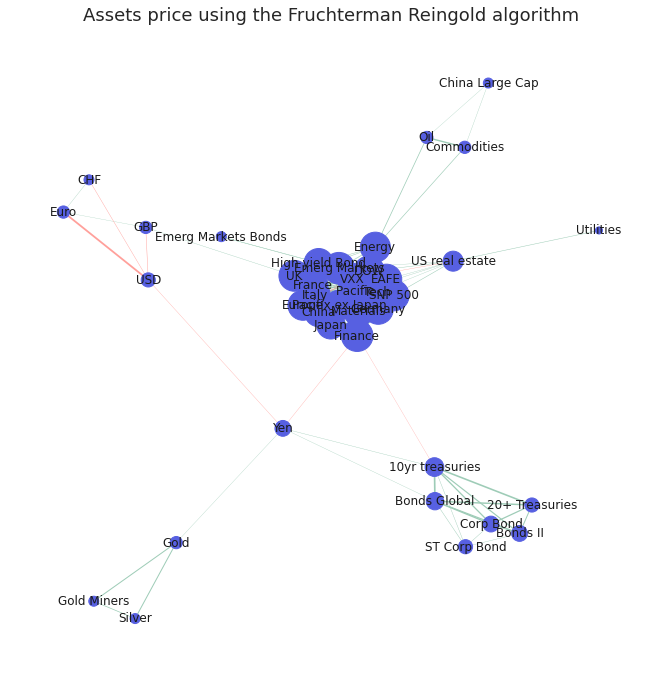

In [ ]:
# draw improved graph
nx.draw(Gx, pos=nx.fruchterman_reingold_layout(Gx), with_labels=True, node_size=node_size, node_color="#5760e1", edge_color=edge_colours, width=edge_width,)
plt.title("Assets price using the Fruchterman Reingold algorithm", fontdict=font_dict)
plt.show()

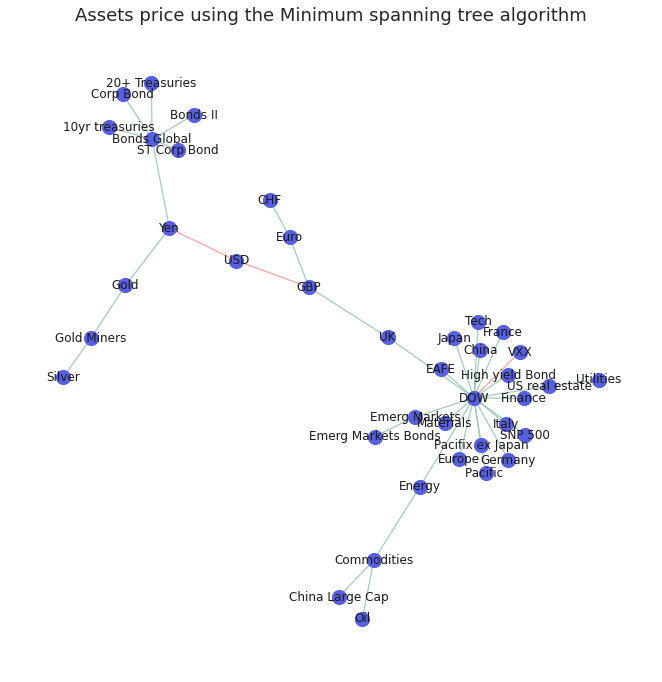

In [ ]:
# Build our minimum spanning tree layout
mst = nx.minimum_spanning_tree(Gx)

edge_colours = []

# assign edge colours
for key, value in nx.get_edge_attributes(mst, "correlation").items():
    edge_colours.append(assign_colour(value))


# draw minimum spanning tree. Set node size and width to constant
nx.draw(mst, with_labels=True, pos=nx.fruchterman_reingold_layout(mst), node_size=200, node_color="#5760e1", edge_color=edge_colours, width=1.2,)

# set title
plt.title("Assets price using the Minimum spanning tree algorithm", fontdict=font_dict)
plt.show()